In [180]:
import wordcloud as wc
from IPython.core.display import HTML
import matplotlib.pylab as plt
import numpy as np
import matplotlib.patheffects as PathEffects


In [175]:
def WordCloudFreq(title, freq_dict, word_to_color_map=None, circle=False, repeat=True, center_text=False):
    
    mask = None
    if circle:
        x, y = np.ogrid[:300, :300]
        mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
        mask = 255 * mask.astype(int)

    wc_class = wc.WordCloud(background_color='white', mask=mask, repeat=repeat)
    wordcloud = wc_class.generate_from_frequencies(freq_dict) 
    
    if word_to_color_map:
        wordcloud.recolor(color_func = word_to_color_map)
    
    plt.imshow(wordcloud, interpolation="bilinear")
    if center_text:
        if circle:
            w, h = 150, 150
        else:
            w, h = wordcloud.width/2, wordcloud.height/2 
        txt = plt.text(w, h, title, 
                 fontname="Times New Roman Bold", fontsize=50, ha='center', va='center', alpha=.6)
        txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    else:
        plt.title(title, 
                 fontname="Times New Roman Bold", fontsize=30)
    plt.axis("off")
    return f

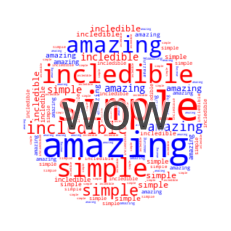

In [179]:
color_table = {'amazing':'blue', 'simple':'red', 'incledible':'red'}
freq_dict = {'amazing':2, 'simple':3, 'incledible':2}

def my_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'black' if word == 'wow' else color_table[word]


plt.close('all')
WordCloudFreq('wow', freq_dict, my_color_func, circle=True, center_text=True)
plt.show()

In [3]:
import pickle
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [4]:
topic = 'Mathematics'
tree_path = '../wikidat/tree_'+topic+'_with_cat.tree'
t = pickle.load(open(tree_path,'rb'))

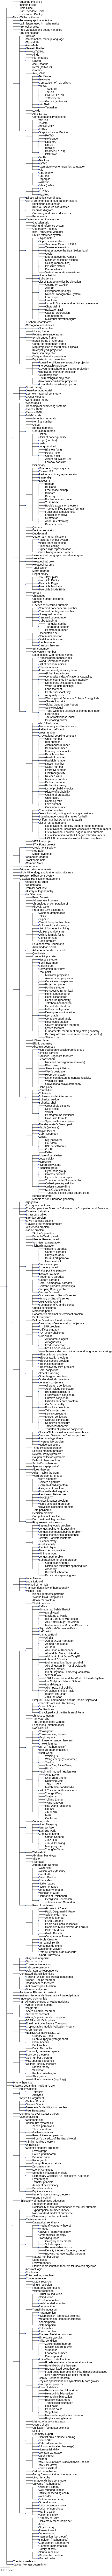

In [5]:
t.render("%%inline")